In [6]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

[[35  0  0]
 [ 0 32  3]
 [ 0  2 33]]


<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


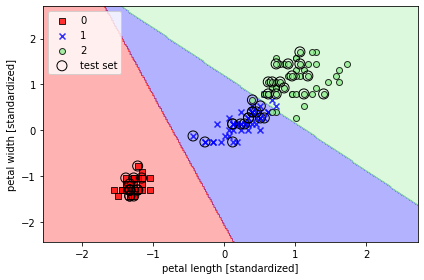

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 

iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.3,random_state = 1, stratify = y)

sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))


lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(x_train, y_train)

pred = lr.predict(x_train)
print(confusion_matrix(y_train,pred))

plot_decision_regions(x_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 

iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.3,random_state = 1, stratify = y)

sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))


lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(x_train, y_train)

pred = lr.predict(x_train)
print(confusion_matrix(y_train,pred))

plot_decision_regions(x_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

 L1 OR L2 處理過度擬合

[[35  0  0]
 [ 1 28  6]
 [ 0  1 34]]


<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


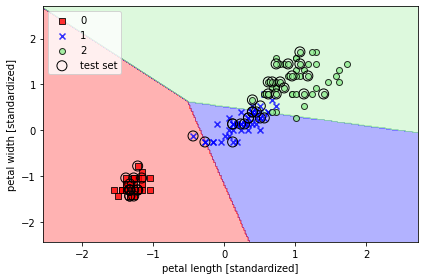

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 

iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.3,random_state = 1, stratify = y)

sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))


lr = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr')
lr.fit(x_train, y_train)

pred = lr.predict(x_train)
print(confusion_matrix(y_train,pred))

plot_decision_regions(x_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

[[35  0  0]
 [ 0 32  3]
 [ 0  3 32]]


<ipython-input-6-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


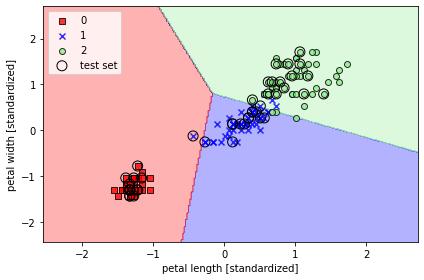

In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 

iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.3,random_state = 1, stratify = y)

sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))


lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')
lr.fit(x_train, y_train)

pred = lr.predict(x_train)
print(confusion_matrix(y_train,pred))

plot_decision_regions(x_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()